<h1><center>Kaggle: Telco Customer Churn.</center></h1>
<br>
1. Demographic:

In [1]:
#load required packages and dataset
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
df=pd.read_csv('C:/Users/KIBET/ADSGIT/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [2]:
#a. Which 2 demographics have proven to be the most popular with the telco brand?
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

b. If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?
<br>
Answer: They should target their advertisements to Month-to-month subscribers.

2. Services:

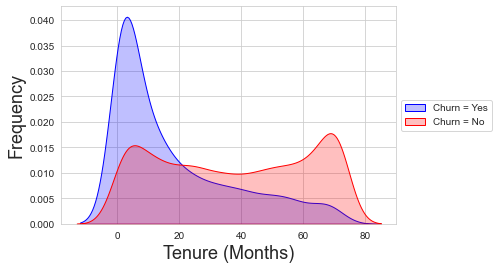

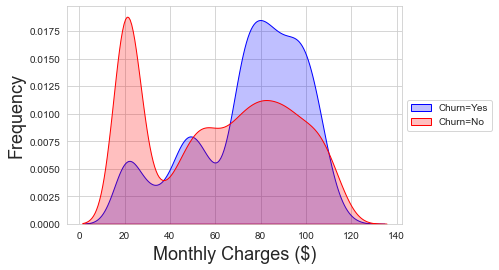

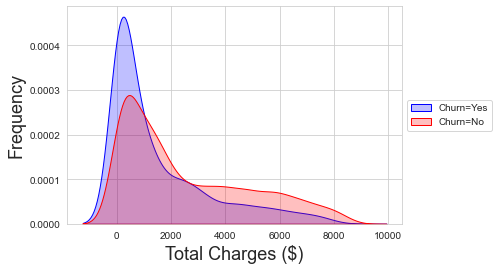

In [3]:
#a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)
#Tenure
sns.set_style('whitegrid')
g1 = sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], shade=True, color="b", label='Churn = Yes')
g1 = sns.kdeplot(df[df['Churn'] == 'No']['tenure'], shade=True, color="r", label='Churn = No')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Tenure (Months)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()
#Monthly Charge
sns.set_style('whitegrid')
g2 = sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], shade=True, color="b", label='Churn=Yes')
g2 = sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], shade=True, color="r", label='Churn=No')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Monthly Charges ($)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()
#Total Charges
df.TotalCharges = df.TotalCharges.replace(" ", 0)
# Change totalcharges type from string to float
df.TotalCharges = df.TotalCharges.astype('float32')
sns.set_style('whitegrid')
g3 = sns.kdeplot(df[df['Churn'] == 'Yes']['TotalCharges'], shade=True, color="b", label='Churn=Yes')
g3 = sns.kdeplot(df[df['Churn'] == 'No']['TotalCharges'], shade=True, color="r", label='Churn=No')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Total Charges ($)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()


In [4]:
#b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?
sns.set_style('whitegrid')
z=df.copy()
df = df.groupby('PhoneService')['Churn'].value_counts().to_frame()
df = df.rename({'Churn':'pct_total'}, axis = 1).reset_index()
df['pct_total'] = (df['pct_total']/len(z)) * 100
a = sns.barplot('PhoneService', y = 'pct_total', hue = 'Churn', data = z)
a.set_title('% Churn by Phone Service', fontsize = 30, fontweight = 'bold')
a.set(xticklabels = ['No Phone', 'Phone'])
a.set_xlabel('')
a.set_ylabel('% of Customers', fontweight = 'bold')
plt.show()   

F:\anaconda\install\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'pct_total'

3. Payment: (Use visualizations in explaining your analysis

a. If the company was to streamline all its services into 3 bouquet packages, what 
monthly prices will be appropriate for the following packages to keep customers 
from churning:
<br>
i. Basic
<br>
ii. Plus
<br>
iii. Premium

In [21]:
#Answer:(a)

def plot_pay_methods(df):
    copy = df.copy()
    plt.subplot(132)
    copy = copy.groupby('paymentmethod')['churn'].value_counts().to_frame()
    copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df))*100
    a = sns.barplot('paymentmethod', 'pct_total', 'churn', data = copy)
    a.set_title('% Churn - Payment Methods', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
    a.set_xticklabels(a.get_xticklabels(), rotation = 45)
 plt.tight_layout()
plot_pay_methods(df)

KeyError: 'PaperlessBilling'

<Figure size 432x288 with 0 Axes>

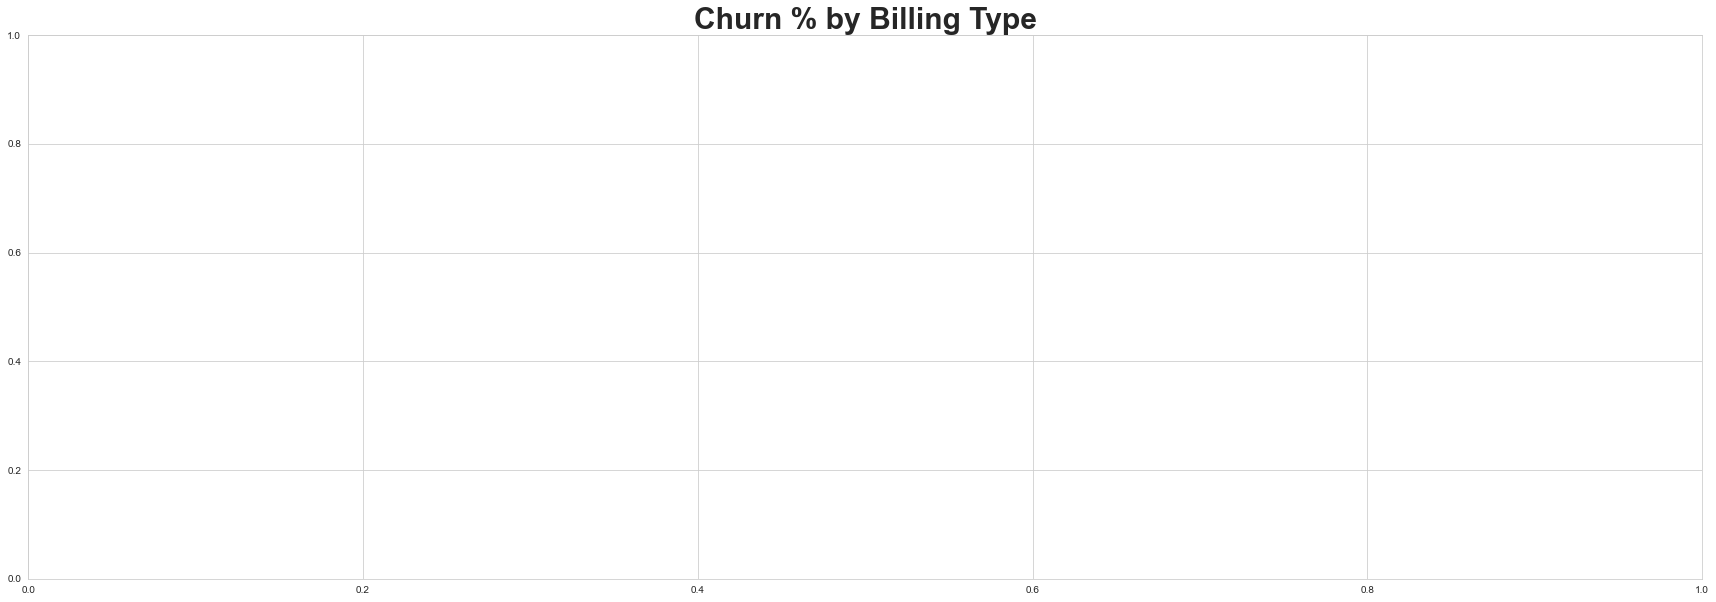

In [20]:
#b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?
def plot_paperless(df):  
    z=df.copy()
    plt.figure(figsize = (30, 10))
    plt.subplot()
    plt.title('Churn % by Billing Type', fontsize = 30, fontweight = 'bold')
    z = z.groupby('PaperlessBilling')['Churn'].value_counts().to_frame()
    z = z.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    z['pct_total'] = (z['pct_total']/len(df)) * 100
    a = sns.barplot('PaperlessBilling', y = 'pct_total', hue = 'Churn', data = copy)
    a.set_title('% Churn - Paperless Billing', fontsize = 30, fontweight = 'bold')
    a.set(xticklabels = ['Paperless', 'Not Paperless'])
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight = 'bold')
plt.tight_layout()
plot_paperless(df)
